This model worked fine (accuracy > 0.8) when classifying dinossaur and dragon images.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from collections import Counter
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
tf.__version__

'2.10.0'

In [27]:
def render_history(history):
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("Our losses")
    plt.show()
    plt.close()

    plt.plot(history["accuracy"], label="accuracy")
    plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.title("Our accuracies")
    plt.show()
    plt.close()

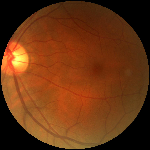

In [3]:
# inspect image
path = '../dat/train/male/'
name = '173_left.jpg'
male = f'{path}{name}'
load_img(male, target_size=(150, 150))

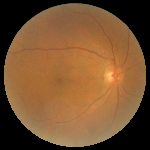

In [4]:
# inspect image
path = '../dat/train/female/'
name = '1005_right.jpg'
female = f'{path}{name}'
load_img(female, target_size=(150, 150))

In [5]:
image_size = (250, 250)
batch_size = 32

In [14]:
# training dataset
# train_gen = ImageDataGenerator(rescale=1./255)
#
# train_ds = train_gen.flow_from_directory(
#    '../dat/train',
#    target_size=(150, 150),
#    class_mode='binary',
#    shuffle=True,
#    batch_size=32
# )

train_ds = image_dataset_from_directory(
    '../dat/train/',
    seed=4231,
    image_size=image_size,
    shuffle=True,
    batch_size=batch_size,
    crop_to_aspect_ratio=True,
    color_mode='grayscale'
)

Found 2816 files belonging to 2 classes.


In [15]:
# validation dataset
# test_gen = ImageDataGenerator(rescale=1./255)
#
# test_ds = test_gen.flow_from_directory(
#    '../dat/val',
#    target_size=(150, 150),
#    class_mode='binary',
#    shuffle=True
# )

val_ds = image_dataset_from_directory(
    '../dat/val/', 
    seed=4231,
    image_size=image_size, 
    shuffle=True,
    batch_size=batch_size,
    crop_to_aspect_ratio=True,
    color_mode='grayscale'
)

Found 412 files belonging to 2 classes.


In [18]:
# class labels
class_names = train_ds.class_names

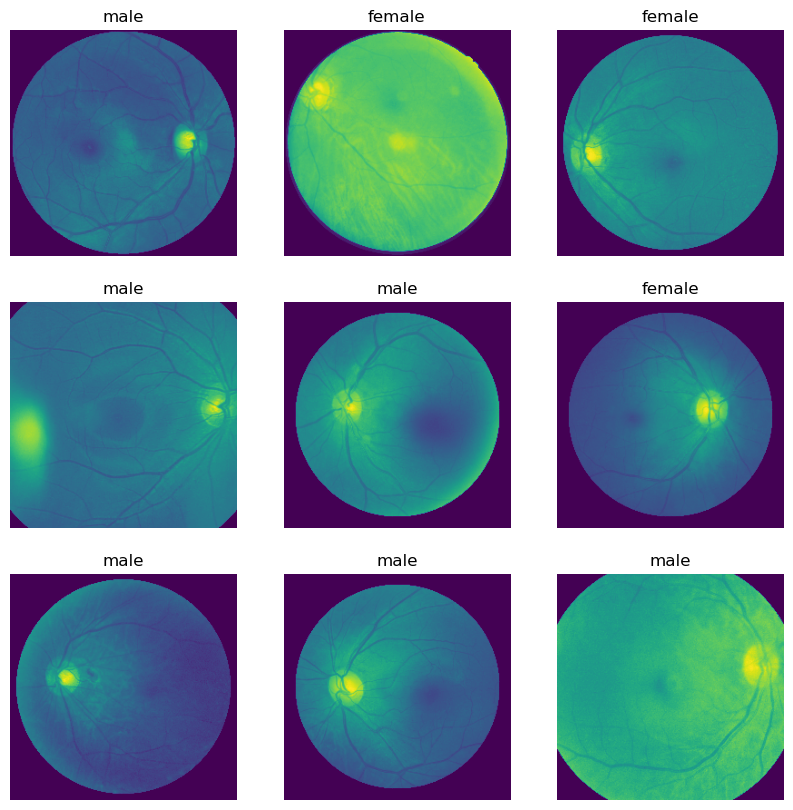

In [19]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
# model 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 492032)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                31490112  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 31,490,497
Trainable params: 31,490,497
Non-trainable params: 0
__________________________________________

In [11]:
history_list = {}

In [26]:
opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    batch_size=20,
    epochs=100,
    validation_data=val_ds
)

history_list['baseline'] = history.history

Epoch 1/100
88/88 [==============================] - 3s 26ms/step - loss: 0.6800 - accuracy: 0.5671 - val_loss: 0.7137 - val_accuracy: 0.5437
Epoch 2/100
88/88 [==============================] - 2s 25ms/step - loss: 0.6798 - accuracy: 0.5643 - val_loss: 0.7147 - val_accuracy: 0.5461
Epoch 3/100
88/88 [==============================] - 2s 25ms/step - loss: 0.6798 - accuracy: 0.5650 - val_loss: 0.7152 - val_accuracy: 0.5485
Epoch 4/100
88/88 [==============================] - 2s 25ms/step - loss: 0.6796 - accuracy: 0.5678 - val_loss: 0.7160 - val_accuracy: 0.5364
Epoch 5/100
88/88 [==============================] - 2s 25ms/step - loss: 0.6794 - accuracy: 0.5682 - val_loss: 0.7162 - val_accuracy: 0.5510
Epoch 6/100
88/88 [==============================] - 2s 25ms/step - loss: 0.6792 - accuracy: 0.5692 - val_loss: 0.7166 - val_accuracy: 0.5510
Epoch 7/100
88/88 [==============================] - 2s 25ms/step - loss: 0.6791 - accuracy: 0.5682 - val_loss: 0.7166 - val_accuracy: 0.5461
Epoch 

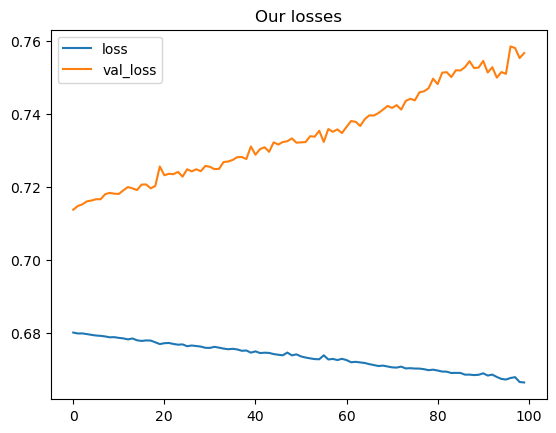

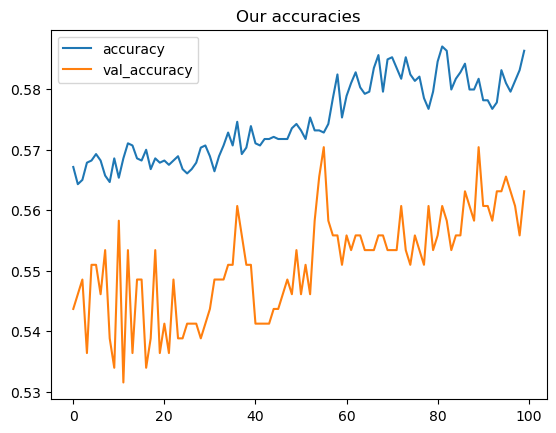

In [28]:
render_history(history.history)

In [29]:
opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    batch_size=20,
    epochs=200,
    validation_data=val_ds
)

history_list['baseline'] = history.history

Epoch 1/200
88/88 [==============================] - 3s 26ms/step - loss: 0.6663 - accuracy: 0.5881 - val_loss: 0.7549 - val_accuracy: 0.5583
Epoch 2/200
88/88 [==============================] - 2s 25ms/step - loss: 0.6657 - accuracy: 0.5920 - val_loss: 0.7587 - val_accuracy: 0.5607
Epoch 3/200
88/88 [==============================] - 2s 25ms/step - loss: 0.6660 - accuracy: 0.5923 - val_loss: 0.7634 - val_accuracy: 0.5607
Epoch 4/200
88/88 [==============================] - 2s 25ms/step - loss: 0.6666 - accuracy: 0.5898 - val_loss: 0.7607 - val_accuracy: 0.5655
Epoch 5/200
88/88 [==============================] - 2s 25ms/step - loss: 0.6659 - accuracy: 0.5923 - val_loss: 0.7625 - val_accuracy: 0.5655
Epoch 6/200
88/88 [==============================] - 2s 25ms/step - loss: 0.6653 - accuracy: 0.5969 - val_loss: 0.7624 - val_accuracy: 0.5534
Epoch 7/200
88/88 [==============================] - 2s 25ms/step - loss: 0.6650 - accuracy: 0.5959 - val_loss: 0.7638 - val_accuracy: 0.5558
Epoch 

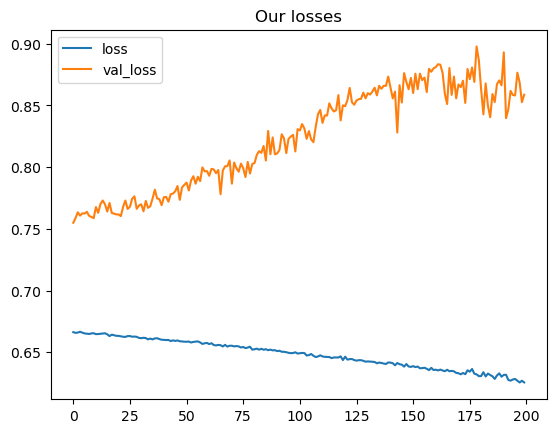

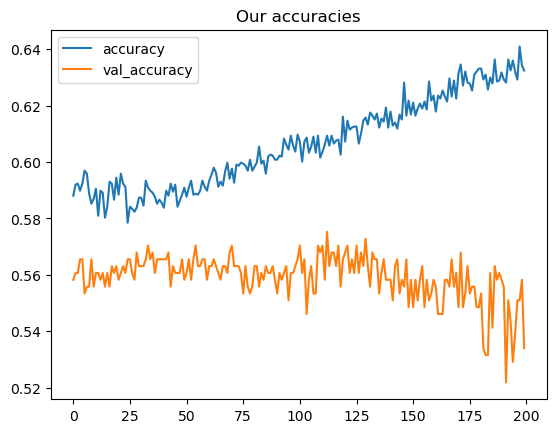

In [30]:
render_history(history.history)